In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import unicodedata
import geopandas as gpd
import get_data
import mapclassify
import contextily as ctx
import numpy as np

In [2]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm
# Font Imports
# heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
# subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=24)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=16)

In [3]:
get_data.get_data()

Baixando arquivos brasil.io...


In [4]:
df = pd.read_csv("data/dados_total_estados.csv")
df = df[df.state != "Indefinido"]
df.index=df['index']
df = df.drop('index', 1)
df



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
index,,,,,,,,,,,,
0,2020-07-22,AP,TOTAL,state,34660,544,124,True,845731.0,16.0,4098.22982,0.0157
1,2020-07-21,AP,TOTAL,state,34405,533,123,False,845731.0,16.0,4068.07838,0.0155
2,2020-07-20,AP,TOTAL,state,34145,515,122,False,845731.0,16.0,4037.33575,0.0151
3,2020-07-19,AP,TOTAL,state,33705,507,121,False,845731.0,16.0,3985.30975,0.0150
4,2020-07-18,AP,TOTAL,state,33585,505,120,False,845731.0,16.0,3971.12084,0.0150
...,...,...,...,...,...,...,...,...,...,...,...,...
346165,2020-02-29,SP,TOTAL,state,2,0,5,False,45919049.0,35.0,0.00436,0.0000
346166,2020-02-28,SP,TOTAL,state,2,0,4,False,45919049.0,35.0,0.00436,0.0000
346167,2020-02-27,SP,TOTAL,state,1,0,3,False,45919049.0,35.0,0.00218,0.0000


In [5]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# States

In [6]:
# Set filepath
fp = "br_unidades_da_federacao/BRUFE250GC_SIR.shp"

# Read file using gpd.read_file()
dataSaude = gpd.read_file(fp)
dataSaude

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [7]:
dataSaude = dataSaude.to_crs(epsg=3857)

In [8]:
states=dataSaude.NM_ESTADO.values
display(states)

for i in range(0,len(dataSaude.index)):
    dataSaude.iloc[i,0] = strip_accents(dataSaude.iloc[i,0])
    
display(dataSaude.head(17))

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL',
       'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO',
       'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARÁ', 'PARAÍBA',
       'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RORAIMA', 'SANTA CATARINA', 'SÃO PAULO',
       'SERGIPE', 'TOCANTINS', 'PARANÁ', 'RONDÔNIA', 'AMAZONAS'],
      dtype=object)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1..."
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43..."
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355...."
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44..."
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603...."
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0..."


In [9]:
dataSaude = dataSaude.to_crs(epsg=3857)

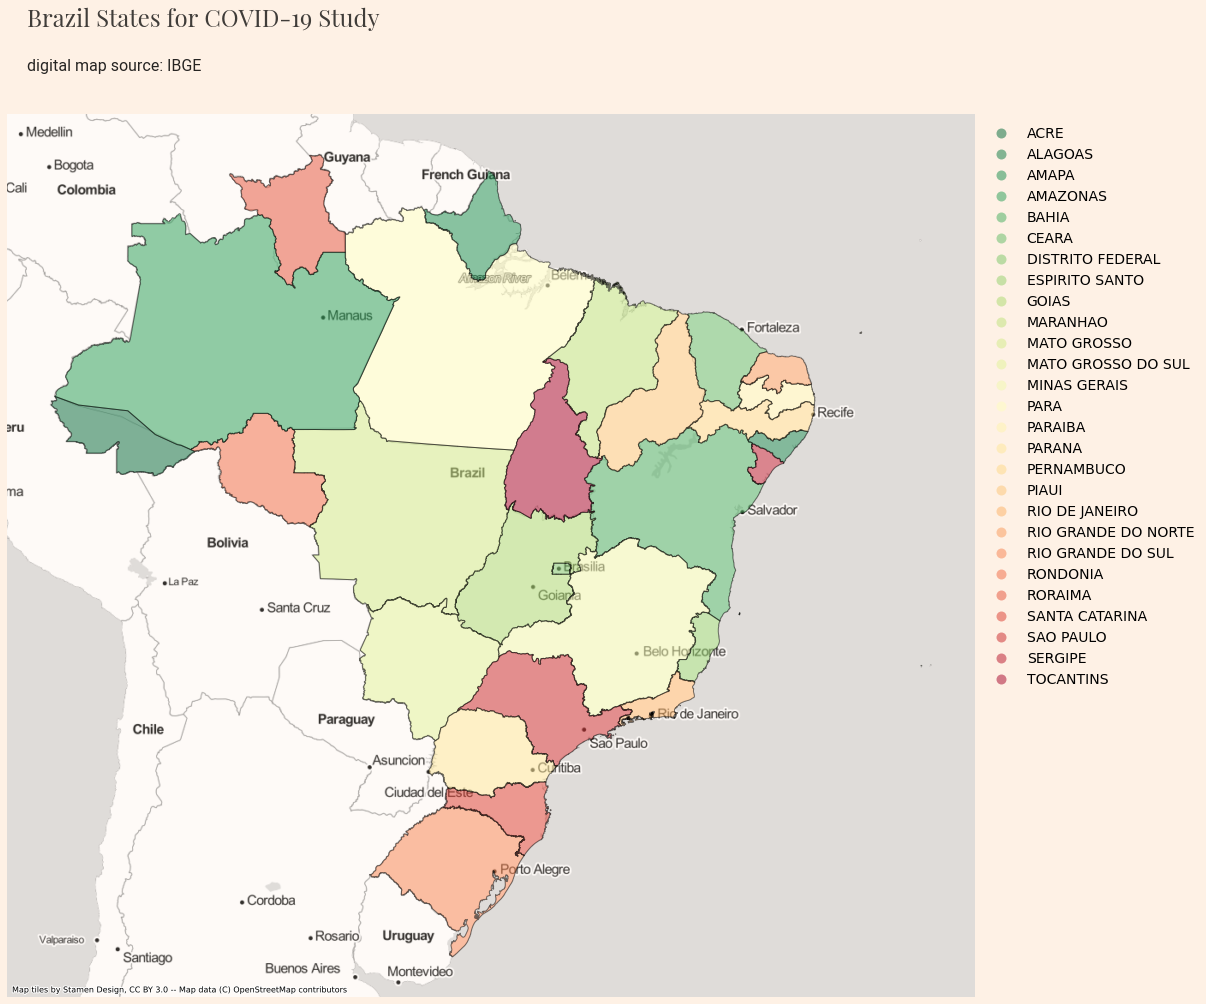

In [10]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.4, 10*1.4),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='NM_ESTADO',alpha=0.5,ax=ax,legend=True,cmap='RdYlGn_r', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='upper left',bbox_to_anchor=(1, 1)))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Brazil States for COVID-19 Study",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)

plt.text(x = 0.02, y = 1.05,
            s = "digital map source: IBGE",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [11]:
states=['AC', 'AL', 'AP', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB',
       'PE', 'PI', 'RJ', 'RN',
       'RS', 'RR', 'SC', 'SP',
       'SE', 'TO', 'PR', 'RO', 'AM']
dataSaude['states']=pd.Series(states,index=dataSaude.index)
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0...",MT


In [12]:
def load_confirmed(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

def load_dead(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

In [13]:
def last_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis) - 1
    return np.where(mask.any(axis=axis), val, invalid_val)

start_date="2020-03-15"
states=sorted(states)
dataSaude=dataSaude.sort_values('states') 

infected=[]
dead=[]
dateX=[]
for state in states:
    deadX=load_dead(start_date, state).values
    date=load_dead(start_date, state).index.values
    lastDead=last_nonzero(deadX,0)[0]
    infectedX=load_confirmed(start_date, state).values
    lastInfected=last_nonzero(infectedX,0)[0]
    lastRecord=min(lastInfected,lastDead)
    infected.append(infectedX[lastRecord][0])
    dead.append(deadX[lastRecord][0])
    dateX=np.append(dateX,date[lastRecord])
    
dataSaude=dataSaude.sort_values('states')  
dataSaude['infected']=pd.Series(infected,index=dataSaude.index)
dataSaude['dead']=pd.Series(dead,index=dataSaude.index)
dataSaude['date']=pd.Series(dateX,index=dataSaude.index)

In [14]:
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states,infected,dead,date
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC,17979.0,470.0,2020-07-22
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL,51680.0,1443.0,2020-07-22
26,AMAZONAS,NORTE,13,"POLYGON ((-7494705.886 225993.992, -7493674.00...",AM,92721.0,3183.0,2020-07-22
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP,34660.0,544.0,2020-07-22
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA,133245.0,2988.0,2020-07-22
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE,154381.0,7329.0,2020-07-22
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF,87801.0,1176.0,2020-07-22
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES,73755.0,2308.0,2020-07-22
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO,48682.0,1237.0,2020-07-22
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA,109731.0,2810.0,2020-07-22


In [15]:
dfState = pd.read_csv("data/estados.csv")
dfState['id'] = dfState.index
dfState = dfState.sort_values('uf') 
dfState = dfState.reset_index()

dfState['infected']=pd.Series(infected,index=dfState.index)
dfState['infectedPlot']=pd.Series(infected,index=dfState.index)/20
dfState['dead']=pd.Series(dead,index=dfState.index)
dfState['date']=pd.Series(dateX,index=dfState.index)

gdf = gpd.GeoDataFrame(
    dfState, geometry=gpd.points_from_xy(dfState.longitude,dfState.latitude),crs=4326)

display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry
0,1,12,AC,Acre,-8.77,-70.55,1,17979.0,898.95,470.0,2020-07-22,POINT (-70.55000 -8.77000)
1,13,27,AL,Alagoas,-9.62,-36.82,13,51680.0,2584.00,1443.0,2020-07-22,POINT (-36.82000 -9.62000)
2,2,13,AM,Amazonas,-3.47,-65.10,2,92721.0,4636.05,3183.0,2020-07-22,POINT (-65.10000 -3.47000)
3,5,16,AP,Amapá,1.41,-51.77,5,34660.0,1733.00,544.0,2020-07-22,POINT (-51.77000 1.41000)
4,15,29,BA,Bahia,-13.29,-41.71,15,133245.0,6662.25,2988.0,2020-07-22,POINT (-41.71000 -13.29000)
5,9,23,CE,Ceará,-5.20,-39.53,9,154381.0,7719.05,7329.0,2020-07-22,POINT (-39.53000 -5.20000)
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,87801.0,4390.05,1176.0,2020-07-22,POINT (-47.86000 -15.83000)
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,73755.0,3687.75,2308.0,2020-07-22,POINT (-40.34000 -19.19000)
8,25,52,GO,Goiás,-15.98,-49.86,25,48682.0,2434.10,1237.0,2020-07-22,POINT (-49.86000 -15.98000)
9,7,21,MA,Maranhão,-5.42,-45.44,7,109731.0,5486.55,2810.0,2020-07-22,POINT (-45.44000 -5.42000)


In [16]:
dataSaude = dataSaude.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)
plt.close()

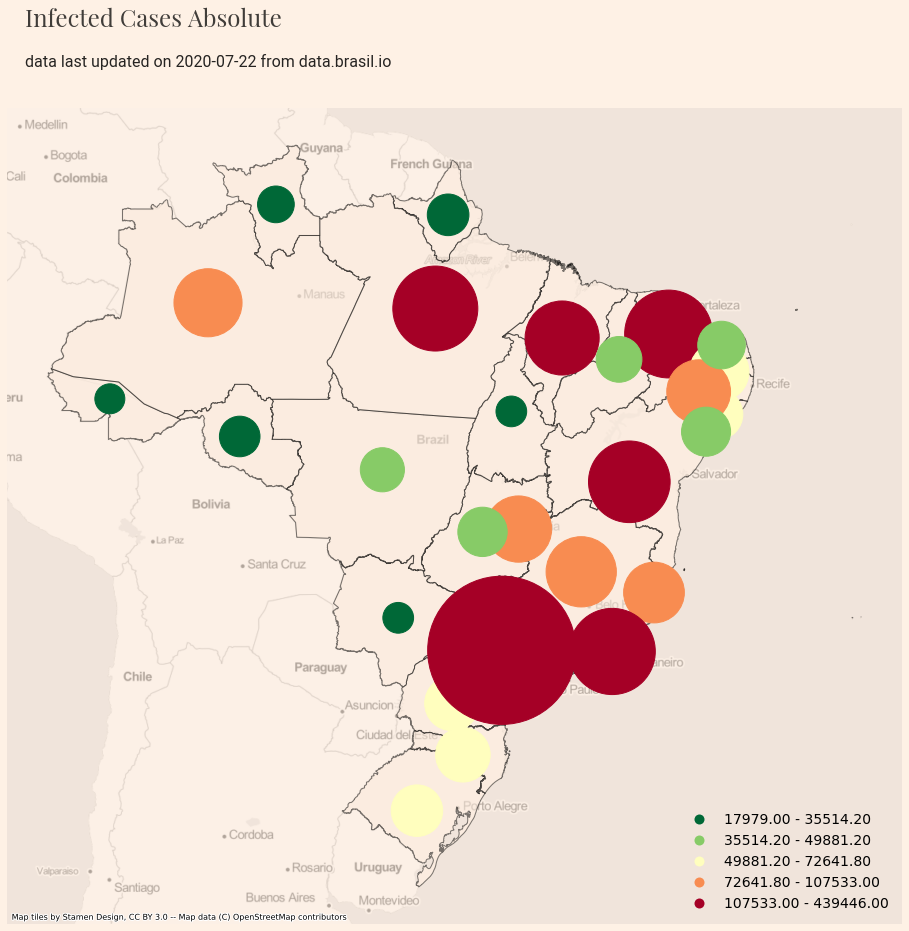

In [17]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='infected', cmap='RdYlGn_r', markersize='infectedPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax=ax,alpha=.3,source=ctx.providers.Stamen.TonerLite) #,source=ctx.providers.Stamen.TonerLite)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected Cases Absolute",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [18]:
df=df.sort_values('state') 
df_select=df.groupby(['date','state'],as_index = False).sum().pivot('date','state')

df_confirmed = df_select.fillna(0)['confirmed']
df_deaths = df_select.fillna(0)['deaths']
df_pop = df_select.fillna(0)['popEst']

df_pop = df_pop.max().to_frame().T


In [19]:
dataSaude['popEst']=pd.Series(df_pop.values[0],index=dataSaude.index)
dataSaude['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deathRatio']=pd.Series(np.array(dead)/np.array(infected),index=dataSaude.index)

In [20]:
gdf['popEst']=pd.Series(df_pop.values[0],index=gdf.index)
gdf['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=gdf.index)
gdf['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=gdf.index)
gdf['deathRatio']=pd.Series(np.array(dead)/np.array(infected)*100,index=gdf.index)
gdf['deathRatioPlot']=pd.Series(np.array(dead)/np.array(infected)*100,index=gdf.index)*1000
gdf['deadPerMiPlot']=pd.Series(dead/df_pop.values[0]*1e6,index=gdf.index)*20
gdf['infectedPerMiPlot']=pd.Series(infected/df_pop.values[0]*1e6,index=gdf.index)

display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry,popEst,infectedPerMi,deadPerMi,deathRatio,deathRatioPlot,deadPerMiPlot,infectedPerMiPlot
0,1,12,AC,Acre,-8.77,-70.55,1,17979.0,898.95,470.0,2020-07-22,POINT (-7853590.075 -980106.597),881935.0,20385.856101,532.919093,2.614161,2614.160966,10658.381854,20385.856101
1,13,27,AL,Alagoas,-9.62,-36.82,13,51680.0,2584.00,1443.0,2020-07-22,POINT (-4098783.651 -1075960.783),3337357.0,15485.307685,432.378076,2.792183,2792.182663,8647.561528,15485.307685
2,2,13,AM,Amazonas,-3.47,-65.10,2,92721.0,4636.05,3183.0,2020-07-22,POINT (-7246898.851 -386514.986),4144597.0,22371.535761,767.987816,3.432879,3432.879283,15359.756329,22371.535761
3,5,16,AP,Amapá,1.41,-51.77,5,34660.0,1733.00,544.0,2020-07-22,POINT (-5763010.038 156976.327),845731.0,40982.298154,643.230531,1.569533,1569.532602,12864.610615,40982.298154
4,15,29,BA,Bahia,-13.29,-41.71,15,133245.0,6662.25,2988.0,2020-07-22,POINT (-4643135.961 -1492883.605),14873064.0,8958.813060,200.900097,2.242486,2242.485647,4018.001940,8958.813060
5,9,23,CE,Ceará,-5.20,-39.53,9,154381.0,7719.05,7329.0,2020-07-22,POINT (-4400459.471 -579657.659),9132078.0,16905.352758,802.555563,4.747346,4747.345852,16051.111259,16905.352758
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,87801.0,4390.05,1176.0,2020-07-22,POINT (-5327750.829 -1785044.155),3015268.0,29118.804697,390.015083,1.339392,1339.392490,7800.301665,29118.804697
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,73755.0,3687.75,2308.0,2020-07-22,POINT (-4490628.259 -2177318.158),4018650.0,18353.178306,574.322223,3.129279,3129.279371,11486.444453,18353.178306
8,25,52,GO,Goiás,-15.98,-49.86,25,48682.0,2434.10,1237.0,2020-07-22,POINT (-5550389.811 -1802406.770),7018354.0,6936.384229,176.252153,2.540980,2540.980239,3525.043051,6936.384229
9,7,21,MA,Maranhão,-5.42,-45.44,7,109731.0,5486.55,2810.0,2020-07-22,POINT (-5058357.662 -604253.513),7075181.0,15509.285204,397.162984,2.560808,2560.807794,7943.259685,15509.285204


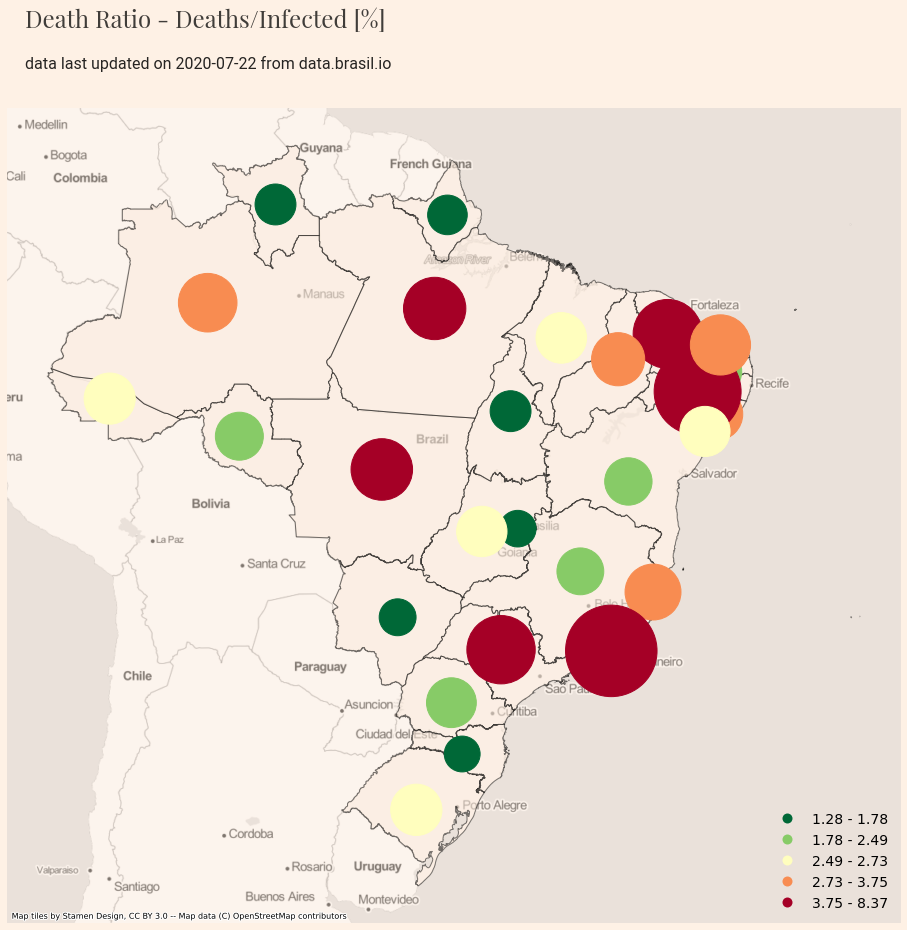

In [21]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='deathRatio', cmap='RdYlGn_r', markersize='deathRatioPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Death Ratio - Deaths/Infected [%]",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

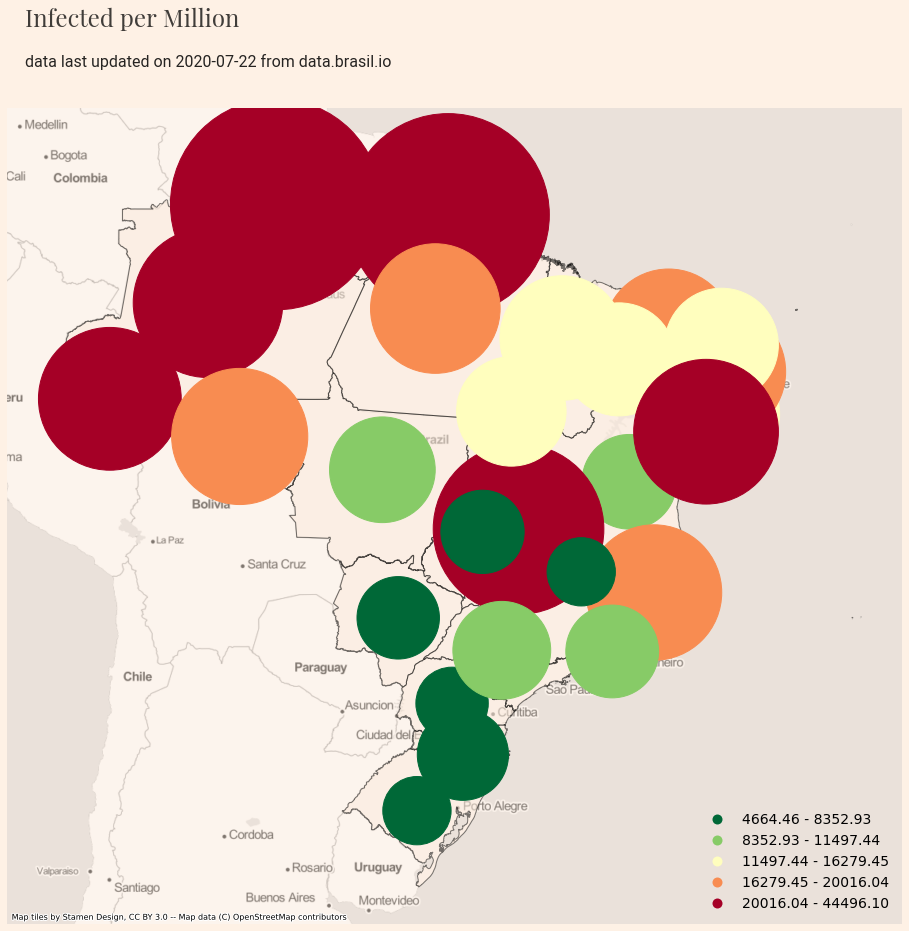

In [22]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='infectedPerMi', cmap='RdYlGn_r', markersize='infectedPerMiPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

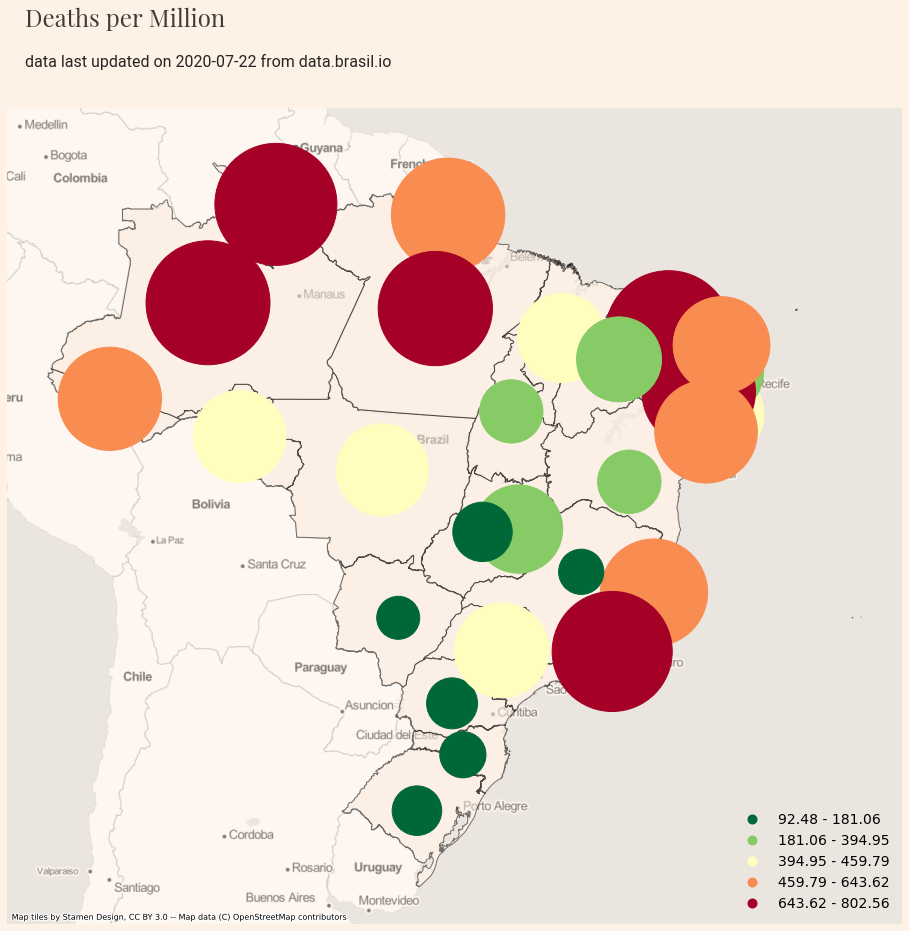

In [23]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='deadPerMi', cmap='RdYlGn_r', markersize='deadPerMiPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


ax.set_axis_off()
# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Deaths per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [24]:
# 3857
gdf['geometry']=dataSaude.geometry
gdf=gdf.to_crs(epsg=3857)


display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry,popEst,infectedPerMi,deadPerMi,deathRatio,deathRatioPlot,deadPerMiPlot,infectedPerMiPlot
0,1,12,AC,Acre,-8.77,-70.55,1,17979.0,898.95,470.0,2020-07-22,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",881935.0,20385.856101,532.919093,2.614161,2614.160966,10658.381854,20385.856101
1,13,27,AL,Alagoas,-9.62,-36.82,13,51680.0,2584.00,1443.0,2020-07-22,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",3337357.0,15485.307685,432.378076,2.792183,2792.182663,8647.561528,15485.307685
2,2,13,AM,Amazonas,-3.47,-65.10,2,92721.0,4636.05,3183.0,2020-07-22,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",4144597.0,22371.535761,767.987816,3.432879,3432.879283,15359.756329,22371.535761
3,5,16,AP,Amapá,1.41,-51.77,5,34660.0,1733.00,544.0,2020-07-22,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",845731.0,40982.298154,643.230531,1.569533,1569.532602,12864.610615,40982.298154
4,15,29,BA,Bahia,-13.29,-41.71,15,133245.0,6662.25,2988.0,2020-07-22,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",14873064.0,8958.813060,200.900097,2.242486,2242.485647,4018.001940,8958.813060
5,9,23,CE,Ceará,-5.20,-39.53,9,154381.0,7719.05,7329.0,2020-07-22,"POLYGON ((-5349266.664 -1746921.064, -5347355....",9132078.0,16905.352758,802.555563,4.747346,4747.345852,16051.111259,16905.352758
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,87801.0,4390.05,1176.0,2020-07-22,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",3015268.0,29118.804697,390.015083,1.339392,1339.392490,7800.301665,29118.804697
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,73755.0,3687.75,2308.0,2020-07-22,"POLYGON ((-5583801.974 -1393553.197, -5583603....",4018650.0,18353.178306,574.322223,3.129279,3129.279371,11486.444453,18353.178306
8,25,52,GO,Goiás,-15.98,-49.86,25,48682.0,2434.10,1237.0,2020-07-22,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",7018354.0,6936.384229,176.252153,2.540980,2540.980239,3525.043051,6936.384229
9,7,21,MA,Maranhão,-5.42,-45.44,7,109731.0,5486.55,2810.0,2020-07-22,"POLYGON ((-6449226.491 -854896.346, -6448787.0...",7075181.0,15509.285204,397.162984,2.560808,2560.807794,7943.259685,15509.285204


In [25]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
HTML("<style> @import url('https://fonts.googleapis.com/css2?family=Playfair+Display&family=Roboto&display=swap');</style>")


In [26]:
import json
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'

geodf = gpd.read_file('br_unidades_da_federacao/BRUFE250GC_SIR.shp')
geodf.to_file("br_unidades_da_federacao/estados.json", driver = "GeoJSON")
with open("br_unidades_da_federacao/estados.json") as geofile:
    jdata = json.load(geofile)

for k in range(len(jdata['features'])):
    jdata['features'][k]['id'] = k

print(jdata['features'][0].keys())
print(jdata['features'][0]['properties'])

def figMap(jdata):
    fig=go.Figure(go.Choroplethmapbox(geojson=jdata, locations=gdf['id'],showlegend=False,showscale=False,
                                    z=gdf['id'],colorscale=["white","gray"], #,"black"],
                                    marker_opacity=0.2, marker_line_width=1.5))
    
    fig.update_layout( mapbox_style="carto-positron", 
                      mapbox_zoom=3.2*1.25,     
       mapbox_center = {"lat": (gdf.latitude.max()+gdf.latitude.min())/2, \
                 "lon": (gdf.longitude.max()+gdf.longitude.min())/2},
        geo=dict(showland=False,
            lataxis=dict(range=[gdf.latitude.min(), gdf.latitude.max()]),
            lonaxis=dict(range=[gdf.longitude.min(), gdf.longitude.max()]),
            scope="south america",
            ),
            paper_bgcolor=color_bg,
            plot_bgcolor="gray",
            width=800*1.3,
            height=700*2,
            showlegend=False)
    
#     fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout( mapbox_style="light", \
                      mapbox_accesstoken='pk.eyJ1IjoiZ2FzaWx2YTE5NzMiLCJhIjoiY2tjNTNiaXdjMGR5MjJybzZzdHU2bjFrMSJ9.Ni_co0QEn1WVVfefOkbRBg')


    return fig


dict_keys(['type', 'properties', 'geometry', 'id'])
{'NM_ESTADO': 'ACRE', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '12'}


In [27]:
def figPlot(jdata,gdf,propMap,titlePlot,simulation=False):
    
    fig=figMap(jdata)

    fig.add_trace(go.Scattermapbox(
            lat=gdf.latitude,
            lon=gdf.longitude, #size_max=50,
            mode='markers',
            marker=go.scattermapbox.Marker(
                showscale=True, 
                size=abs(gdf[propMap]),
                sizemode='area',
                sizeref=0.5*max(gdf[propMap])/(40.**2),
                sizemin=4,
                color = gdf[propMap],
                colorscale = ["green","yellow","orange","red"]
            ),
            text=gdf.uf,
        ))
    
#     fig.update_layout(mapbox_style="light", \
#                       mapbox_accesstoken='pk.eyJ1IjoiZ2FzaWx2YTE5NzMiLCJhIjoiY2tjNTNiaXdjMGR5MjJybzZzdHU2bjFrMSJ9.Ni_co0QEn1WVVfefOkbRBg')

    fig.update_geos(fitbounds="locations",visible=False, 
                    resolution=110,
                    showcountries=True, countrycolor="Black",
                    showsubunits=False, subunitcolor="Black")

#     fig.update_layout(mapbox_style="light") #"stamen-terrain") #"open-street-map")

    fig.update_layout(
        geo=dict(
            lataxis=dict(range=[gdf.latitude.min()-3, gdf.latitude.max()+3]),
            lonaxis=dict(range=[gdf.longitude.min()-20, gdf.longitude.max()+1]),
            scope="south america",
            showland = True,
            landcolor = darker_highlight,
            showcoastlines=True, coastlinecolor="RebeccaPurple",
            showocean=True, oceancolor=darker_highlight,
            showlakes=True, lakecolor="Blue",
            showrivers=True, rivercolor="Blue",
            framecolor=darker_highlight,
            ),
            plot_bgcolor="gray",
            width=800*1.3,
            height=700*2,
    )
    
    if simulation:
        strTitle="SEAIRD Model Results for Covid-19 - "+titlePlot
        strSub="Situation for the day "+str(gdf.date.max())
        model='Model'
    else:
        strTitle="Brazil States Covid-19 "+titlePlot
        strSub='Last updated from data.brasil.io on '+str(gdf.date.max()) 
        model=""     
        
    fig.update_layout(title=go.layout.Title(text=strTitle, 
                font=dict(
                family="Playfair Display, serif",
                size=24 )))
    
    fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text=strSub,
            xanchor='left',
            x=-.033,
#             xshift=275,
            yanchor='top',
             y=1.035,
            font=dict(
                family='Roboto, sans-serif',
                size=16            )
        )])

    fig.layout.plot_bgcolor = darker_highlight
    fig.layout.paper_bgcolor = color_bg

    fig['layout']['xaxis'].update(side='top')

    fig.write_html('results/'+propMap+model+'.html', auto_open=True)
    fig.write_image('results/'+propMap+model+'.png',scale=2)

In [28]:
display(HTML("<style>.container { width:100% !important; }</style>"))
import plotly.io as pio
pio.orca.config.use_xvfb = True
pio.orca.config.save()


In [29]:
figPlot(jdata,gdf,propMap="deadPerMi",titlePlot="Deaths per Million")
IFrame(src='results/deadPerMi.html', width=800*1.3, height=700*2)

In [30]:
figPlot(jdata,gdf,propMap="deathRatio",titlePlot="Death Ratio [%]")
IFrame(src='results/deathRatio.html', width=800*1.3, height=700*2)

In [31]:
figPlot(jdata,gdf,propMap="infectedPerMi",titlePlot="Infected per Million")
IFrame(src='results/infectedPerMi.html', width=800*1.3, height=700*2)


In [32]:
# SEAIRD_SP7.pkl

def loadDataFrame(filename):
    df= pd.read_pickle(filename)
    df.columns = [c.lower().replace(' ', '_') for c in df.columns]
    df.columns = [c.lower().replace('(', '') for c in df.columns]
    df.columns = [c.lower().replace(')', '') for c in df.columns]
    return df

In [37]:
dfparam = pd.read_csv("data/param.csv")
dfparam = dfparam.dropna()
display(dfparam)
states=dfparam.state
display(states)

version="8"
date="2020-08-22"

import pandas as pd

dfResults = pd.DataFrame()
data = []
columns = ['date','id','uf','infected','deaths','popEst','infectedPerMi',
           'deathsPerMi','deathRatio','latitude','longitude']

for state in states:
    df = loadDataFrame('./data/SEAIRD_'+state+version+'.pkl')    
    df=df[df.index==date]
    
    values = [date, gdf[gdf.uf==state].id.values[0],state, df.infected.values[0], 
             df.deaths.values[0],gdf[gdf.uf==state].popEst.values[0],
             df.infected.values[0]/gdf[gdf.uf==state].popEst.values[0]*1e6,
             df.deaths.values[0]/gdf[gdf.uf==state].popEst.values[0]*1e6,
             np.divide(df.deaths.values[0],df.infected.values[0])*100,
             gdf[gdf.uf==state].latitude.values[0],
             gdf[gdf.uf==state].longitude.values[0]
             ]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
    
dfResults = dfResults.append(data, True)

display(dfResults)

,state,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,SP,2020-03-15,200,8000000.0,0,0,800,300,250,100,0.15,0.55,0.01
1,ES,2020-04-01,200,475000.0,0,0,50,250,50,100,0.15,0.65,0.01
2,MG,2020-04-01,200,1100000.0,0,0,200,250,40,100,0.15,0.55,0.01
3,RJ,2020-03-20,200,700000.0,0,0,800,250,50,100,0.15,0.50,0.01
4,CE,2020-03-20,200,800000.0,0,0,800,250,50,100,0.15,0.50,0.01
5,PE,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
6,AM,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
7,PA,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
8,PI,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
9,RR,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01


0     SP
1     ES
2     MG
3     RJ
4     CE
5     PE
6     AM
7     PA
8     PI
9     RR
10    AP
Name: state, dtype: object

,date,id,uf,infected,deaths,popEst,infectedPerMi,deathsPerMi,deathRatio,latitude,longitude
0,2020-08-22,19,SP,499246.328541,53340.773570,45919049.0,10872.314201,1161.626269,10.684260,-22.19,-48.79
1,2020-08-22,17,ES,56520.454346,11071.277698,4018650.0,14064.537680,2754.974356,19.588090,-19.19,-40.34
2,2020-08-22,16,MG,121034.434931,8510.260062,21168791.0,5717.588450,402.019183,7.031272,-18.10,-44.38
3,2020-08-22,18,RJ,96578.223490,31094.158230,17264943.0,5593.891824,1800.999762,32.195827,-22.25,-42.66
4,2020-08-22,9,CE,119381.853574,30092.901290,9132078.0,13072.802660,3295.296130,25.207266,-5.20,-39.53
5,2020-08-22,12,PE,73797.667524,20487.346914,9557071.0,7721.787096,2143.684704,27.761510,-8.38,-37.86
6,2020-08-22,2,AM,87848.860437,14455.151935,4144597.0,21195.995760,3487.709887,16.454570,-3.47,-65.10
7,2020-08-22,4,PA,107861.541587,25348.573069,8602865.0,12537.862862,2946.526892,23.501030,-3.79,-52.48
8,2020-08-22,8,PI,49639.308872,4216.515682,3273227.0,15165.250950,1288.183093,8.494308,-6.60,-42.28
9,2020-08-22,3,RR,40300.207340,2203.034095,605761.0,66528.230341,3636.804111,5.466558,1.99,-61.33


In [38]:
figPlot(jdata,dfResults,propMap="infectedPerMi",titlePlot="Infected per Million",simulation=True)
IFrame(src='results/infectedPerMiModel.html', width=800*1.3, height=700*2)

In [39]:
figPlot(jdata,dfResults,propMap="deathsPerMi",titlePlot="Deaths per Million",simulation=True)
IFrame(src='results/deathsPerMiModel.html', width=800*1.3, height=700*2)

In [40]:
figPlot(jdata,dfResults,propMap="deathRatio",titlePlot="Death Ratio[%]",simulation=True)
IFrame(src='results/deathRatioModel.html', width=800*1.3, height=700*2)